# 💎Diamond Price Prediction 

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

## Importing the Dataset
Link to dataset : https://www.kaggle.com/datasets/shubhankitsirvaiya06/diamond-price-prediction

In [2]:
df = pd.read_csv('diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df = df.drop('Unnamed: 0',1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.duplicated().sum()

146

##### Dropping the duplicate entries from df

In [7]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [8]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

##### Separating the X and Y from the df

In [9]:
Y = df[['price']]
X = df.drop(['price'], axis = 1)

In [10]:
num = X.select_dtypes(include=[np.number])
cat = X.select_dtypes(exclude=[np.number])

## Numerical Feature Engineering

In [11]:
num.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


In [12]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.30,0.40,0.50,0.60,0.75,0.85,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,30%,40%,50%,60%,75%,85%,90%,99%,max
carat,53794.0,0.797780,0.473390,0.2,0.24,0.30,0.31,0.40,0.42,0.54,0.70,0.90,1.04,1.24,1.51,2.18,5.01
depth,53794.0,61.748080,1.429909,43.0,57.90,59.30,60.00,61.00,61.20,61.60,61.80,62.10,62.50,62.90,63.30,65.60,79.00
table,53794.0,57.458109,2.233679,43.0,53.00,54.00,55.00,56.00,56.00,57.00,57.00,58.00,59.00,60.00,60.00,64.00,95.00
x,53794.0,5.731214,1.120695,0.0,4.02,4.29,4.36,4.71,4.82,5.23,5.70,6.08,6.54,6.91,7.30,8.35,10.74
y,53794.0,5.734653,1.141209,0.0,4.04,4.30,4.36,4.72,4.83,5.24,5.71,6.08,6.54,6.90,7.30,8.33,58.90
z,53794.0,3.538714,0.705037,0.0,2.48,2.65,2.69,2.91,2.98,3.22,3.53,3.77,4.03,4.26,4.52,5.15,31.80


##### Clipping function below excludes the outliers present.

In [13]:
def outlier_cap(x):
    x = x.clip(lower = x.quantile(0.01))
    x = x.clip(upper = x.quantile(0.99))
    return(x)

In [14]:
num=num.apply(lambda x : outlier_cap(x))

In [15]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.30,0.40,0.50,0.60,0.75,0.85,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,30%,40%,50%,60%,75%,85%,90%,99%,max
carat,53794.0,0.795562,0.464987,0.24,0.24,0.30,0.31,0.40,0.42,0.54,0.70,0.90,1.04,1.24,1.51,2.18,2.18
depth,53794.0,61.744691,1.340372,57.90,57.90,59.30,60.00,61.00,61.20,61.60,61.80,62.10,62.50,62.90,63.30,65.60,65.60
table,53794.0,57.446609,2.173349,53.00,53.00,54.00,55.00,56.00,56.00,57.00,57.00,58.00,59.00,60.00,60.00,64.00,64.00
x,53794.0,5.729885,1.111137,4.02,4.02,4.29,4.36,4.71,4.82,5.23,5.70,6.08,6.54,6.91,7.30,8.35,8.35
y,53794.0,5.731981,1.103578,4.04,4.04,4.30,4.36,4.72,4.83,5.24,5.71,6.08,6.54,6.90,7.30,8.33,8.33
z,53794.0,3.537896,0.685907,2.48,2.48,2.65,2.69,2.91,2.98,3.22,3.53,3.77,4.03,4.26,4.52,5.15,5.15


In [16]:
varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [17]:
num_1

,carat,depth,table,x,y,z
0,0.24,61.5,55.0,4.02,4.04,2.48
1,0.24,59.8,61.0,4.02,4.04,2.48
2,0.24,57.9,64.0,4.05,4.07,2.48
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,5.66,5.68,3.56
53938,0.86,61.0,58.0,6.15,6.12,3.74


##### There are no columns with zero variance so none of the column got dropped.

In [18]:
discrete = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
num_binned = pd.DataFrame(discrete.fit_transform(num_1), index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
num_binned

,carat_Rank,depth_Rank,table_Rank,x_Rank,y_Rank,z_Rank
0,0.0,4.0,1.0,0.0,0.0,0.0
1,0.0,2.0,7.0,0.0,0.0,0.0
2,0.0,0.0,9.0,0.0,0.0,0.0
3,0.0,5.0,4.0,0.0,0.0,0.0
4,0.0,7.0,4.0,0.0,0.0,1.0
...,...,...,...,...,...,...
53935,2.0,3.0,3.0,3.0,4.0,3.0
53936,2.0,6.0,1.0,3.0,3.0,4.0
53937,2.0,6.0,6.0,3.0,3.0,4.0
53938,3.0,4.0,4.0,4.0,4.0,4.0


##### KbinDiscretizer is used here to make a graph of each feature in num_1 vs the target feature (i.e. price).  

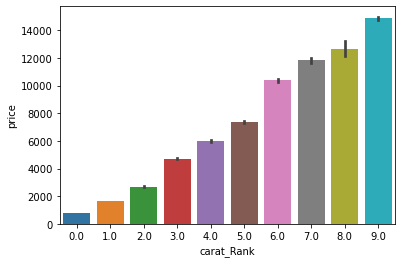

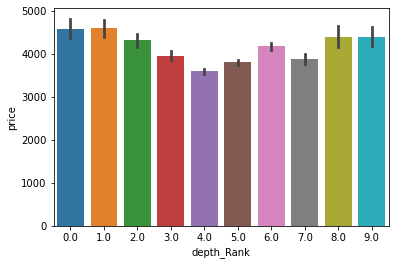

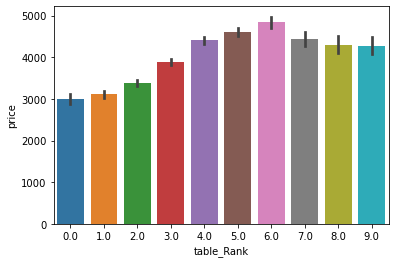

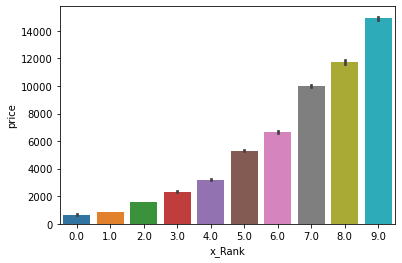

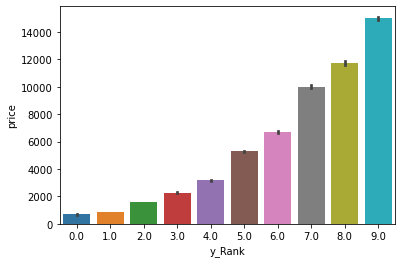

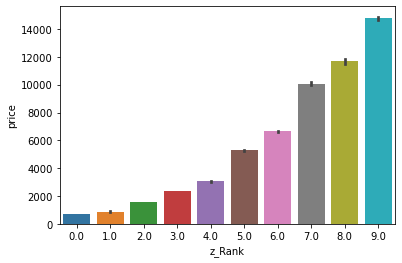

In [19]:
Xbinned = pd.concat([Y,num_binned], axis=1, join='inner')

for col in (num_binned.columns):
    plt.figure()
    sns.barplot(x = col, y = 'price', data = Xbinned, estimator = mean)
plt.show()

In [20]:
num_1 = num_1.drop('depth', 1)
num_1.head()

,carat,table,x,y,z
0,0.24,55.0,4.02,4.04,2.48
1,0.24,61.0,4.02,4.04,2.48
2,0.24,64.0,4.05,4.07,2.48
3,0.29,58.0,4.20,4.23,2.63
4,0.31,58.0,4.34,4.35,2.75


##### In num_1 we dropped depth feature because from figure, we can see there is not much slope to be seen as other columns. Rest features show a good slope giving an intuition that those are having an good amount of effect on the target feature (i.e. price) 

## Categorical Feature Engineering

In [21]:
cat.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [22]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 0 to 53939
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cut      53794 non-null  object
 1   color    53794 non-null  object
 2   clarity  53794 non-null  object
dtypes: object(3)
memory usage: 3.7+ MB


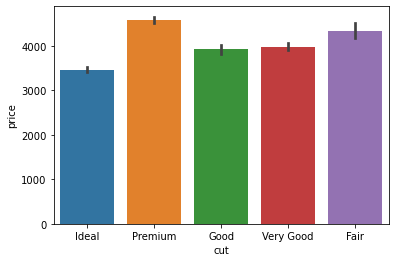

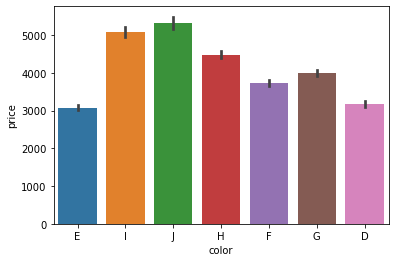

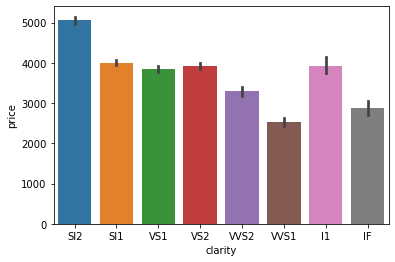

In [23]:
Xchar = pd.concat([Y,cat], axis=1, join='inner')

for col in (cat.columns):
    plt.figure()
    sns.barplot(x = col, y = 'price', data = Xchar, estimator = mean)
plt.show()

In [24]:
X_char_dum = pd.get_dummies(cat, drop_first = True)
X_char_dum.shape

(53794, 17)

In [25]:
X_char_dum.head()

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [26]:
selector = SelectKBest(chi2, k=15)

##### Here we are using KBest to select best features out of all the categorical features. Here, k = 15 denotes no of top features to be selected. 

In [27]:
selector.fit_transform(X_char_dum, Y)

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [28]:
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [29]:
select_features_df_char.head()

,cut_Good,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [30]:
cat_1 = pd.DataFrame(select_features_df_char)
cat_1.shape

(53794, 15)

In [31]:
Xall = pd.concat([num_1, cat_1], axis=1, join='inner')
Xall.head()

,carat,table,x,y,z,cut_Good,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.24,55.0,4.02,4.04,2.48,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.24,61.0,4.02,4.04,2.48,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.24,64.0,4.05,4.07,2.48,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,58.0,4.20,4.23,2.63,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,58.0,4.34,4.35,2.75,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [32]:
print(Xall.columns)

Index(['carat', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')


##### Above are all the columns that are being considered during model development

In [33]:
Xall.shape

(53794, 20)

### Test Train Split

In [34]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xall, Y, test_size=0.2, random_state=101)

##### Having a look at shape of training, testing data and mean of target variable

In [35]:
print("Shape of Training Data",Xtrain.shape)
print("\nShape of Testing Data",Xtest.shape)
print("\nMean price in Training Data",Ytrain.mean())
print("\nMean price in Testing Data",Ytest.mean())

Shape of Training Data (43035, 20)

Shape of Testing Data (10759, 20)

Mean price in Training Data price    3933.958569
dtype: float64

Mean price in Testing Data price    3929.491217
dtype: float64


## Making Pipelines and fitting models

In [36]:
pipeline_lr=Pipeline([("lr_regressor",LinearRegression())])
pipeline_dt=Pipeline([("dt_regressor",DecisionTreeRegressor())])
pipeline_rf=Pipeline([("rf_regressor",RandomForestRegressor())])
pipeline_svm=Pipeline([("svm_regressor", SVR(kernel = 'rbf'))])
pipeline_kn=Pipeline([("kn_regressor",KNeighborsRegressor())])
pipeline_xgb=Pipeline([("xgb_regressor",XGBRegressor())])
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svm, pipeline_kn,pipeline_xgb]
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest", 3: "SVMRegressor", 4: "KNeighbor",5:"XGBoost"}
for pipe in pipelines:
    pipe.fit(Xtrain, Ytrain)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


##### Training Accuracy of each model

In [40]:
for i, model in enumerate(pipelines):
    print(f'\n{pipe_dict[i]} Training Accuracy: {model.score(Xtrain,Ytrain)}')


LinearRegression Training Accuracy: 0.9280194017816433

DecisionTree Training Accuracy: 0.9991578743921723

RandomForest Training Accuracy: 0.9957792356657483

SVMRegressor Training Accuracy: -0.11282677118314455

KNeighbor Training Accuracy: 0.9723810676139834

XGBoost Training Accuracy: 0.9877016436183174


##### Testing Accuracy of each model

In [41]:
for i, model in enumerate(pipelines):
    print(f'\n{pipe_dict[i]} Test Accuracy: {model.score(Xtest,Ytest)}')


LinearRegression Test Accuracy: 0.9265250099911464

DecisionTree Test Accuracy: 0.9577040217306393

RandomForest Test Accuracy: 0.9728303222615093

SVMRegressor Test Accuracy: -0.11491688375173603

KNeighbor Test Accuracy: 0.9563631536246787

XGBoost Test Accuracy: 0.9765602918234914


### Best Model with respect to accuracy

In [42]:
best_accuracy=0.0
best_pipeline=''
best_classifier=0


for i, model in enumerate(pipelines):
    if model.score(Xtest,Ytest)>best_accuracy:
        best_accuracy = model.score(Xtest, Ytest)
        best_pipeline = model
        best_classifier = i
print(f'Model with best accuracy: {pipe_dict[best_classifier]}')

Model with best accuracy: XGBoost


##### Predictions of each model

In [43]:
for i, model in enumerate(pipelines):
    print(f'\n{pipe_dict[i]} prediction: {model.predict(Xtest)}')


LinearRegression prediction: [[6601.26764206]
 [1894.89550334]
 [ 558.62526067]
 ...
 [3762.79369878]
 [-694.16261731]
 [2946.92516229]]

DecisionTree prediction: [7365. 1323.  802. ... 3619.  558. 2602.]

RandomForest prediction: [7492.95 1401.75  742.14 ... 3526.02  546.36 2705.97]

SVMRegressor prediction: [2448.73789034 2369.57554265 2329.45876863 ... 2421.31473876 2302.68126495
 2398.75889088]

KNeighbor prediction: [[6174.4]
 [1412.8]
 [ 613.8]
 ...
 [3913.6]
 [ 506.6]
 [2472.2]]

XGBoost prediction: [7568.843  1433.8162  656.0665 ... 3663.9822  592.7593 2555.7563]


## Other Matrices to find Best Model

##### R Squared Value of each model

In [44]:
for i, model in enumerate(pipelines):
    print(f"\nR^2 {pipe_dict[i]} :",metrics.r2_score(Ytest, model.predict(Xtest) ))


R^2 LinearRegression : 0.9265250099911464

R^2 DecisionTree : 0.9577040217306393

R^2 RandomForest : 0.9728303222615093

R^2 SVMRegressor : -0.11491688375173603

R^2 KNeighbor : 0.9563631536246787

R^2 XGBoost : 0.9765602918234914


##### Mean Absolute Error of each model

In [45]:
for i, model in enumerate(pipelines):
    print(f"\nMAE {pipe_dict[i]}:",metrics.mean_absolute_error(Ytest, model.predict(Xtest)))


MAE LinearRegression: 716.8572009212276

MAE DecisionTree: 383.4269430526099

MAE RandomForest: 302.6974654751749

MAE SVMRegressor: 2733.32549189663

MAE KNeighbor: 415.0480713820987

MAE XGBoost: 308.174219499823


##### Mean Square Error of each model

In [46]:
for i, model in enumerate(pipelines):
    print(f"\nMSE {pipe_dict[i]}:",metrics.mean_squared_error(Ytest, model.predict(Xtest) ))


MSE LinearRegression: 1147063.7663534656

MSE DecisionTree: 660308.8224906351

MSE RandomForest: 424162.7371921752

MSE SVMRegressor: 17405660.888055008

MSE KNeighbor: 681241.9484375871

MSE XGBoost: 365931.8625280836


#### Root Mean Square Error of each model

In [47]:
for i, model in enumerate(pipelines):
    print(f"\nRMSE {pipe_dict[i]}:",np.sqrt(metrics.mean_squared_error(Ytest, model.predict(Xtest))))


RMSE LinearRegression: 1071.0106284969659

RMSE DecisionTree: 812.5938853391866

RMSE RandomForest: 651.2777726839564

RMSE SVMRegressor: 4172.009214761517

RMSE KNeighbor: 825.3738234506757

RMSE XGBoost: 604.9230219855115


## Conclusion

* Diamond price prediction is a regression problem
* Most important Numerical features are:- 
        "carat", "table", "x", "y" and "z".
* Most important Categorical features are:-
        'cut_Good', 'cut_Very Good', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 
        'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
        'clarity_VVS1' and 'clarity_VVS2'.
* Testing Accuracy is maximum for XGBoost model with accuracy 97.65%.
* Other metrics such as R2 , Mean Absolute Error, Mean Squared Error, Root Mean Squared Error confirm that XGBoost is indeed optimum than that of other models.
